In [324]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [325]:
df = pd.read_csv('result3.csv').values
Ground_truth = df[:,0].reshape(-1,1)
Predicted_depth = df[:,1].reshape(-1,1)

In [326]:
Ground_truth

array([[40.],
       [45.],
       [50.],
       [55.],
       [57.],
       [60.],
       [65.],
       [70.],
       [75.]])

In [327]:
Predicted_depth

array([[28.17854 ],
       [27.960379],
       [27.763733],
       [27.641127],
       [27.571062],
       [27.553123],
       [27.100744],
       [26.4602  ],
       [25.785126]])

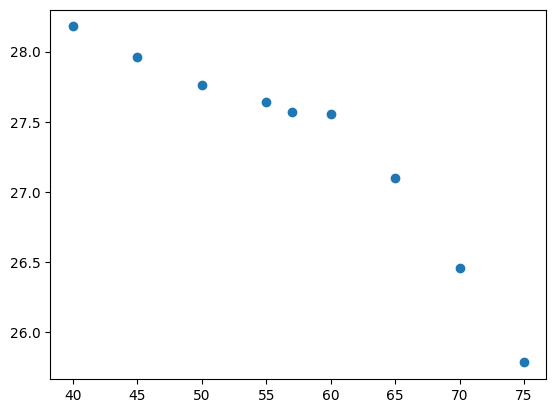

In [328]:
plt.scatter(Ground_truth, Predicted_depth)
plt.show()

In [ ]:
X_4 = np.sum(Predicted_depth**4)
X_3 = np.sum(Predicted_depth**3)
X_2 = np.sum(Predicted_depth**2)
X = np.sum(Predicted_depth)
Y = np.sum(Ground_truth)
X2_Y = np.sum(Predicted_depth**2 * Ground_truth)
X_Y = np.sum(Predicted_depth*Ground_truth)
X_4

5045450.525159196

In [ ]:
X_mat = np.array([[X_4, X_3, X_2],[X_3, X_2, X],[X_2, X, 1]]).reshape(3,3)
Y_mat = np.array([X2_Y, X_Y, Y]).reshape(3,1)

In [323]:
res = np.dot(np.linalg.inv(X_mat), Y_mat)
a,b,c = res
# np.save('coef.npy', np.array([a,b,c]))

In [ ]:
temp_rel = []
temp_abs = []
for i in range(25,30):
    temp_rel.append(i)
    temp_abs.append(a*(i**2) + b*i +c)

temp_abs = np.array(temp_abs).reshape(-1,1)
temp_rel = np.array(temp_rel).reshape(-1,1)


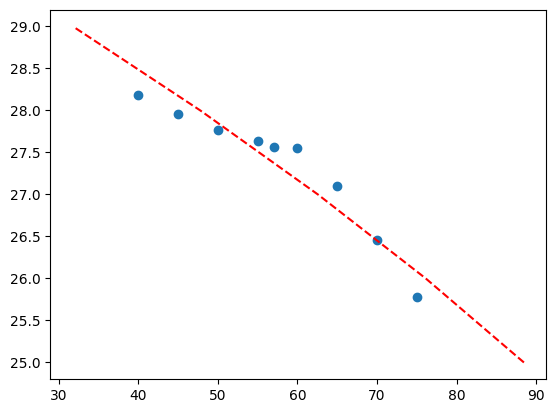

In [ ]:
plt.scatter(Ground_truth, Predicted_depth)
plt.plot(temp_abs, temp_rel, 'r--')
plt.show()

In [ ]:
def Predicted_Distance(a,b,c, depth_value):
    return (a*(depth_value**2) + b*depth_value +c)

In [ ]:
temp = []
for i in range(Predicted_depth.size):
    predicted_depth = float(Predicted_depth[i][0])
    ground_truth = float(Ground_truth[i][0])
    predicted_distance = round(float(Predicted_Distance(a,b,c,predicted_depth)),2)
    temp.append([ground_truth, predicted_distance, np.abs(predicted_distance-ground_truth), (np.abs(predicted_distance-ground_truth)/ground_truth)*100])
temp = pd.DataFrame(np.array(temp), columns=['Ground truth (cm)', 'Predicted distance (cm)', 'Error (cm)', 'Error (%)'])
temp

C:\Users\admin\AppData\Local\Temp\ipykernel_16940\4148870751.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_distance = round(float(Predicted_Distance(a,b,c,predicted_depth)),2)


,Ground truth (cm),Predicted distance (cm),Error (cm),Error (%)
0,40.0,45.04,5.04,12.600000
1,45.0,48.42,3.42,7.600000
2,50.0,51.41,1.41,2.820000
3,55.0,53.25,1.75,3.181818
4,57.0,54.29,2.71,4.754386
5,60.0,54.56,5.44,9.066667
6,65.0,61.14,3.86,5.938462
7,70.0,70.04,0.04,0.057143
8,75.0,78.87,3.87,5.160000
